<a href="https://colab.research.google.com/github/7692TITO/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS_Tito_Varghese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

#**Importing Libraries** **(Data Collection)**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from wordcloud import WordCloud

In [2]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [4]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset

zomato_reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentimental Analysis-Tito Varghese/Zomato Restaurant reviews.csv')
zomato_restaurant_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentimental Analysis-Tito Varghese/Zomato Restaurant names and Metadata.csv')

#**Dataset Inspection and Cleaning**

###**Zomato Restaurant Data Set**

In [6]:
#to get the shape of the dataset
zomato_restaurant_df.shape

(105, 6)

In [7]:
#to find the data type and non-null count in the features
zomato_restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


1.The Zomato_restuarant dataset consist of 105 rows and 6 features.

2.The data types of all the features are object.

3.Two features are having missing values i.e the collections and timings features.



In [8]:
#inorder to find out the dataset description
zomato_restaurant_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


1.The most common cuisines available in the most of the restaurant is the North Indian and Chinese. Hence we can say that there is a high demand for these cuisines from the customers end.

2.The most frequent working hours of the restaurant is between 11am to 11pm.

3.The billing amount of rupees 500 is the most frequent cost paid by the customers on their order.




In [9]:
# changing the data type of the cost feature to numeric
zomato_restaurant_df['Cost'] = zomato_restaurant_df['Cost'].str.replace(",","").astype('int64')

In [10]:
# to see the first five rows of the data set
zomato_restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [11]:
#to find out the missing values in the data set
zomato_restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

###The collections feature has 54 null values and timings feature has 1 null value.
###Dropping off the nan values in Collection feature will not be a good idea because out of 105 rows if we drop 54 rows it may lead to loss of data information.Hence we will replace nan value in Collection feature with Tags Undefined.

In [12]:
#Replacing the null obsevations in the Collections feature with Tags Undefined
zomato_restaurant_df['Collections'].fillna('Tags Undefined',inplace=True)

In [13]:
# since all the data is cleaned and there is 1 missing data in Timings feature which we can drop 
zomato_restaurant_df.dropna(inplace=True)

In [14]:
# missing values in the data set
zomato_restaurant_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [15]:
#checking for duplicate rows in the data set
zomato_restaurant_df.duplicated().sum()

0

###The data set does not contain any duplicate rows

In [16]:
#Final shape of our zomato restaurant data after cleaning the data set
zomato_restaurant_df.shape

(104, 6)

### **Zomato Customer Review Dataset**

In [17]:
#to get the shape of the dataset
zomato_reviews_df.shape

(10000, 7)

###The dataset consist of 10,000 rows and 7 columns

In [18]:
#to get the information about the data set
zomato_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


The data type of all the features except Pictures are Object data type.

The Pictures feature is an integer data type

Apart from Restaurant and Pictures features,rest all other features consists of null values

In [19]:
#to know the dataset description
zomato_reviews_df.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


In [20]:
#to find the duplicate rows in the data set
zomato_reviews_df.duplicated().sum()

36

We have 36 duplicate rows,hence we will drop these duplicate rows

In [21]:
# drop the duplicate rows and Resetting the index after dropping the duplicate rows from the data set
zomato_reviews_df = zomato_reviews_df.drop_duplicates().reset_index()

#dropping the old index column
zomato_reviews_df.drop(labels='index',axis=1,inplace=True)

In [22]:
#to find the missing values in the data set
zomato_reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [23]:
#printing the first five rows of the data set
zomato_reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [24]:
zomato_reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

We can see that rating value has one string value 'Like',which is acts as an anomaly.hence we will replace it to nan 

In [25]:
# Replacing the rating value 'LIKE' to nan
zomato_reviews_df.loc[zomato_reviews_df['Rating'] == 'Like'] = np.nan

In [26]:
#Converting the data type of Rating and Time
zomato_reviews_df['Rating'] = zomato_reviews_df['Rating'].astype('float64')
zomato_reviews_df['Time'] = pd.to_datetime(zomato_reviews_df['Time'])

In [27]:
#feature engineering on Time feature(adding new features)
zomato_reviews_df['Hour'] = pd.DatetimeIndex(zomato_reviews_df['Time']).hour
zomato_reviews_df['Week'] = pd.DatetimeIndex(zomato_reviews_df['Time']).week
zomato_reviews_df['Month'] = pd.DatetimeIndex(zomato_reviews_df['Time']).month
zomato_reviews_df['Year'] = pd.DatetimeIndex(zomato_reviews_df['Time']).year



In [28]:
#feature engineering on Metadata  feature(adding new features)
zomato_reviews_df['Reviews'],zomato_reviews_df['Followers']=zomato_reviews_df['Metadata'].str.split(',').str
zomato_reviews_df['Reviews'] = pd.to_numeric(zomato_reviews_df['Reviews'].str.split(' ').str[0])
zomato_reviews_df['Followers'] = pd.to_numeric(zomato_reviews_df['Followers'].str.split(' ').str[1])

In [29]:
#dropping the metadata after feature engineering
zomato_reviews_df = zomato_reviews_df.drop(['Metadata'], axis =1)

In [30]:
zomato_reviews_df.isnull().sum()

Restaurant       1
Reviewer         3
Review          10
Rating           3
Time             3
Pictures         1
Hour             3
Week             3
Month            3
Year             3
Reviews          3
Followers     1581
dtype: int64

In [31]:
# checking the null obsevations in the Followers feature
zomato_reviews_df[zomato_reviews_df['Followers'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,15.0,21.0,5.0,2019.0,1.0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,21.0,5.0,2019.0,1.0,NaN
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,15.0,21.0,5.0,2019.0,1.0,NaN
14,Beyond Flavours,Kankaria.ritu,"We ordered corn cheese balls, manchow soup and...",1.0,2019-05-22 21:19:00,0.0,21.0,21.0,5.0,2019.0,1.0,NaN
24,Beyond Flavours,Amritap Datta,"Excellent experience, mouthwatering food, good...",5.0,2019-05-20 23:33:00,0.0,23.0,21.0,5.0,2019.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9876,Chinese Pavilion,Anil Rao,The tofu with mushrooms was absolutely wonderf...,5.0,2019-04-04 02:15:00,0.0,2.0,14.0,4.0,2019.0,9.0,NaN
9882,Chinese Pavilion,Ajay Munjal,The food is delicious. Service is excellent. I...,5.0,2019-02-16 13:56:00,0.0,13.0,7.0,2.0,2019.0,4.0,NaN
9897,Chinese Pavilion,Korak Mukherjee,I was here last night with 2 of my friends. We...,1.0,2018-05-29 16:02:00,1.0,16.0,22.0,5.0,2018.0,9.0,NaN
9904,Chinese Pavilion,Anubinda Dash,The food was amazing. Do not forget to try 'Mo...,4.5,2018-03-02 19:54:00,10.0,19.0,9.0,3.0,2018.0,11.0,NaN


In [32]:
#Replacing the null obsevations in the Followers feature with 0
zomato_reviews_df['Followers'].fillna(0,inplace=True)

In [33]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
zomato_reviews_df.dropna(inplace=True)

In [34]:
zomato_reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Hour          0
Week          0
Month         0
Year          0
Reviews       0
Followers     0
dtype: int64

In [35]:
# Final shape of our zomato review data set after cleaning
zomato_reviews_df.shape

(9954, 12)

#**Exploratory Data Analysis**

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

Best restaurants in the city on the basis of Ratings

The Most Popular Cuisines 

The Most Common Tags given to the Restaurants

The most affordable and the expensive Restaurants

Cuisines and their Costing

Active Reviewer 







##**Zomato Restaurant Data Set**

##**Restaurants**

Top 30 Expensive Restaurants


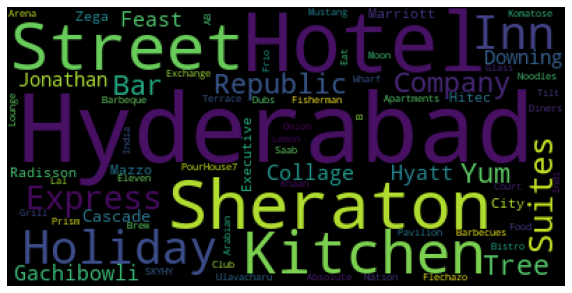

In [36]:
#Creating the wordcloud
print('Top 30 Expensive Restaurants')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_restaurant_df.sort_values('Cost',ascending=False).Name[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

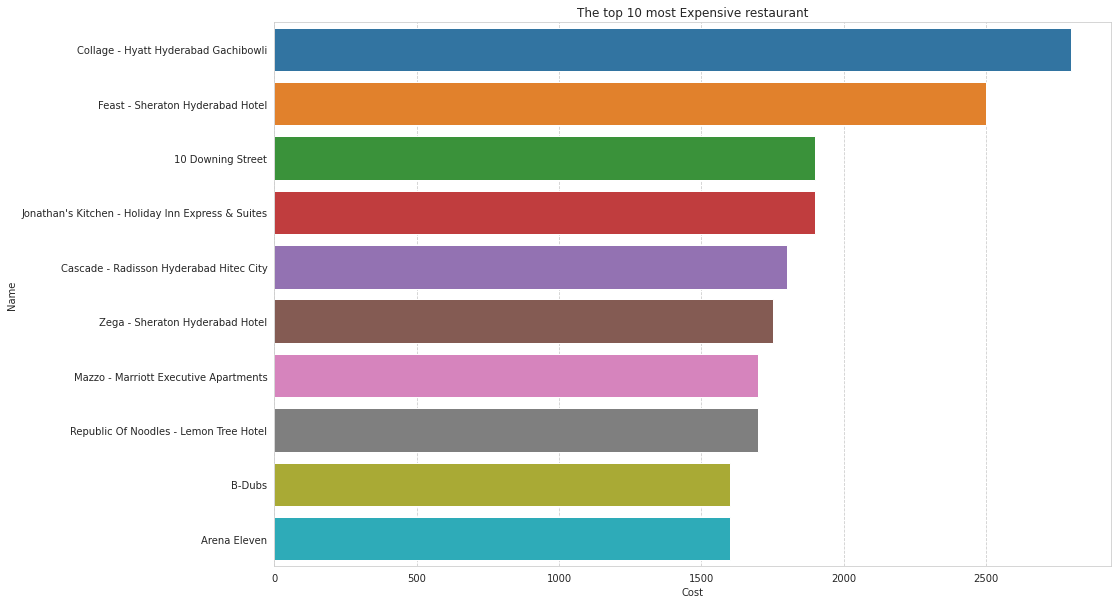

In [37]:
#The top 10 most expensive restaurants
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Name", 
            data=zomato_restaurant_df, 
            order=zomato_restaurant_df.sort_values('Cost',ascending=False).Name[:10])

plt.title('The top 10 most Expensive restaurant')
plt.show()

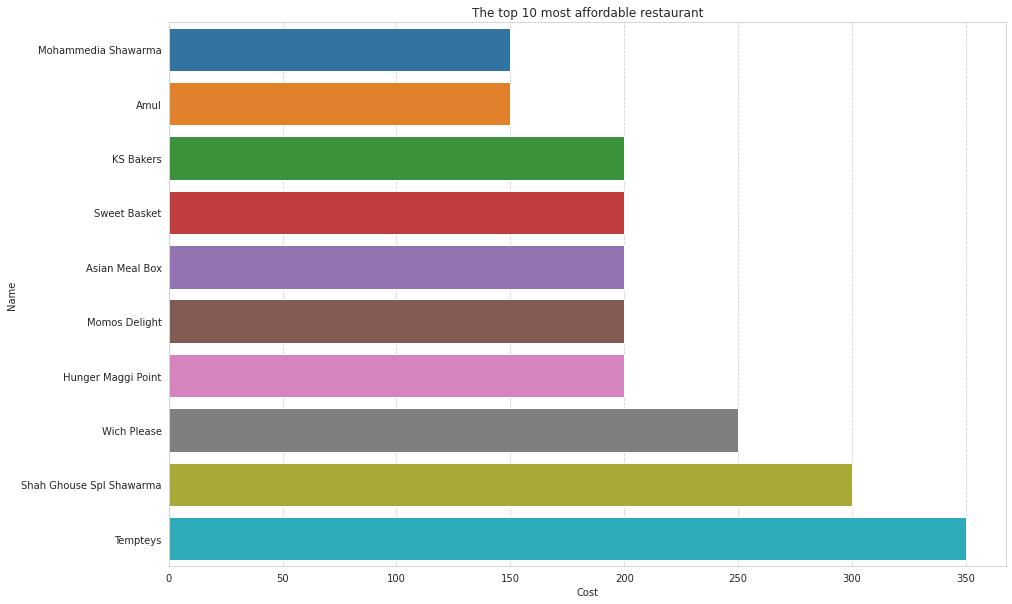

In [38]:
#The top 10 most affordable restaurants

figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Name", 
            data=zomato_restaurant_df, 
            order=zomato_restaurant_df.sort_values('Cost').Name[:10])


plt.title('The top 10 most affordable restaurant')
plt.show()

##**Cuisines**

Top Cuisines


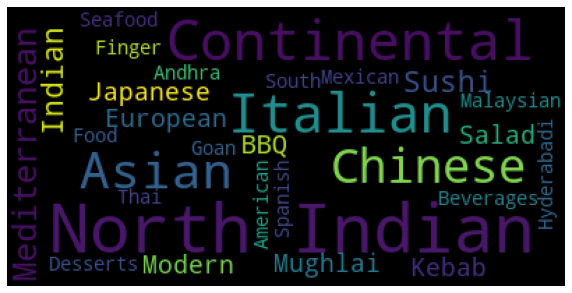

In [39]:
#Creating the wordcloud
print('Top Cuisines')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_restaurant_df.sort_values('Cost',ascending=False).Cuisines[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [40]:
#let's see the most on demand cuisines available
zomato_restaurant_df['Cuisines'].value_counts().transpose()

North Indian, Chinese                                   4
North Indian                                            3
North Indian, Biryani, Chinese                          2
Fast Food                                               2
Biryani, North Indian, Chinese                          2
                                                       ..
Andhra, Biryani, Hyderabadi, North Indian               1
Biryani, South Indian, North Indian, Chinese, Andhra    1
Italian, North Indian, South Indian, Asian              1
North Indian, Fast Food                                 1
Thai, Asian, Chinese, Malaysian                         1
Name: Cuisines, Length: 91, dtype: int64

In [41]:
#Splitting the Cuisines feature and storing it into a list
zomato_restaurant_df['Cuisines']=zomato_restaurant_df['Cuisines'].str.split(', ')

In [42]:
#Using explode method to converts each element of the Cuisines column into a row.
zomato_restaurant_df= zomato_restaurant_df.explode('Cuisines')

In [43]:
#top five cuisines highly on demand
zomato_restaurant_df['Cuisines'].value_counts()[:5]

North Indian    60
Chinese         43
Continental     21
Biryani         16
Fast Food       15
Name: Cuisines, dtype: int64

In [44]:
#Grouping Cuisines by Restaurants count
cuisine_df = zomato_restaurant_df.groupby(['Cuisines']).agg({'Name':'count'}).reset_index()

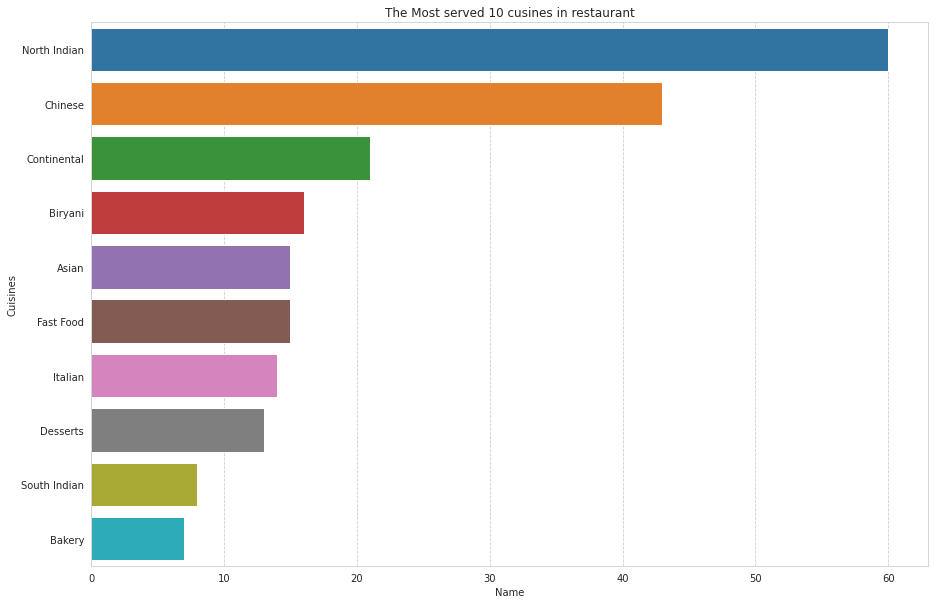

In [45]:
# The top 10 cuisines highly on demand in restaurants
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(y='Cuisines',
            x="Name", 
            data=cuisine_df, 
            order=cuisine_df.sort_values('Name',ascending=False).Cuisines[:10])
   

plt.title('The Most served 10 cusines in restaurant')
plt.show()

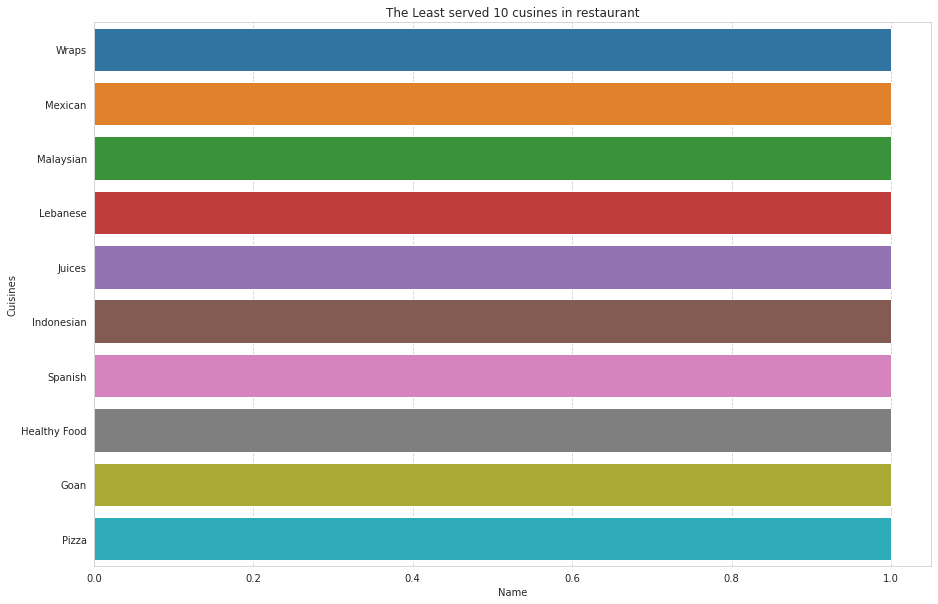

In [46]:
#The least on demand 10 cuisines in restaurants
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(y='Cuisines',
            x="Name", 
            data=cuisine_df, 
            order=cuisine_df.sort_values('Name').Cuisines[:10])
   

plt.title('The Least served 10 cusines in restaurant')
plt.show()

In [47]:
#Grouping Cuisines by Mean Cost
cuisine_df1 = zomato_restaurant_df.groupby(['Cuisines']).agg({'Cost':'mean'}).reset_index()

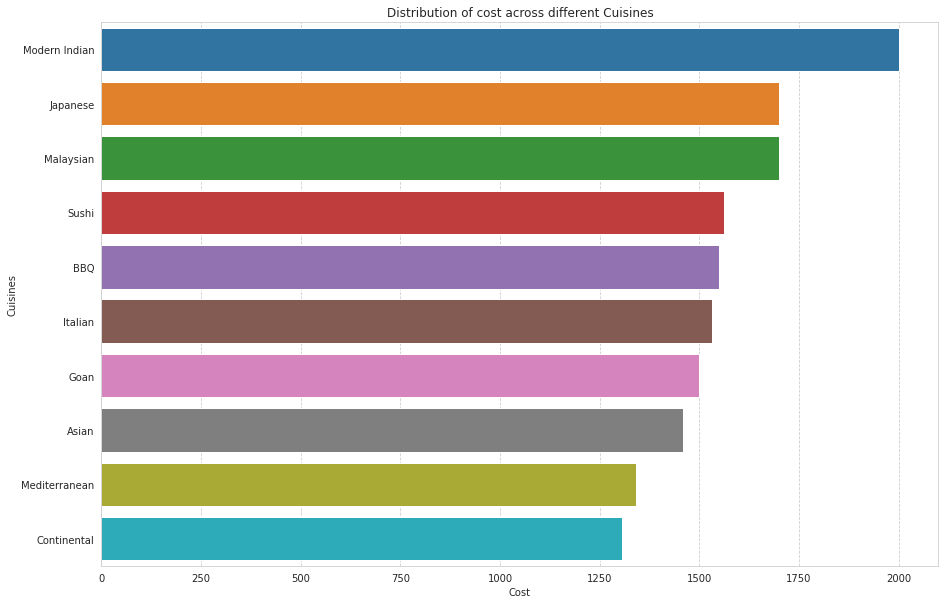

In [48]:
#The top 10 most expensive cuisines
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Cuisines", 
            data=cuisine_df1, 
            order=cuisine_df1.sort_values('Cost',ascending=False).Cuisines[:10])

plt.title('Distribution of cost across different Cuisines')
plt.show()

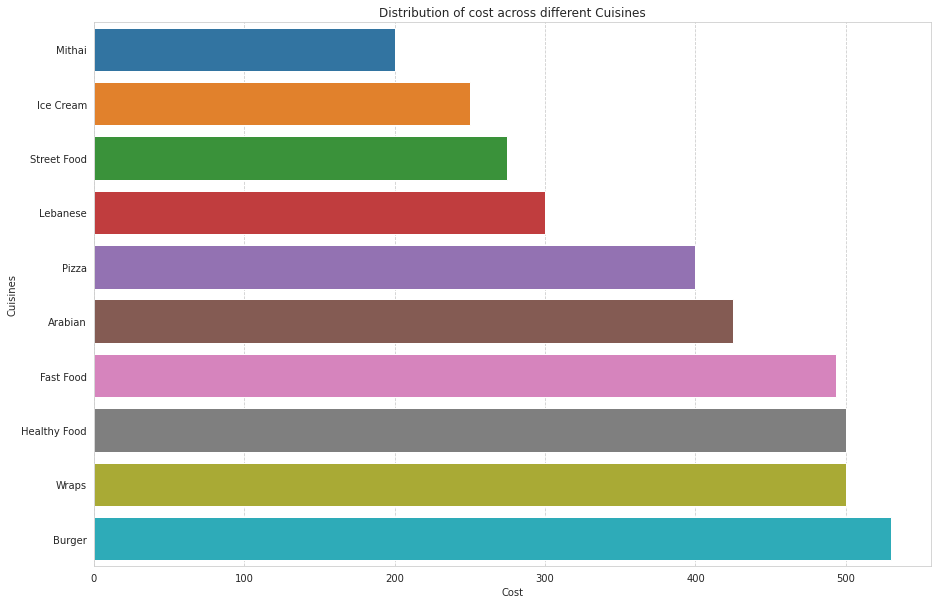

In [49]:
#The top 10 most affordable cuisines
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Cuisines", 
            data=cuisine_df1, 
            order=cuisine_df1.sort_values('Cost',ascending=True).Cuisines[:10])

plt.title('Distribution of cost across different Cuisines')
plt.show()

In [50]:
#Grouping restaurants by number of cuisines available
restaurant_df = zomato_restaurant_df.groupby(['Name']).agg({'Cuisines':'count'}).reset_index()

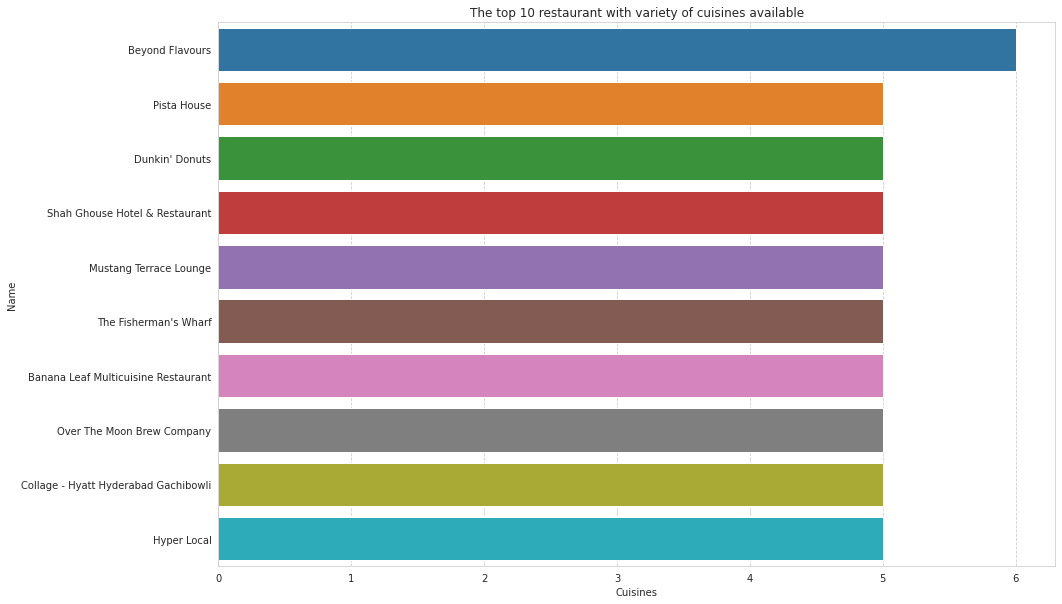

In [51]:
#The top 10 restaurant with variety of cuisines available

figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cuisines',
            y="Name", 
            data=restaurant_df, 
            order=restaurant_df.sort_values('Cuisines',ascending=False).Name[:10])


plt.title('The top 10 restaurant with variety of cuisines available')
plt.show()

##**Collections (tagging different restaurants based on zomato categories)**

Top 30 Restaurant Tags


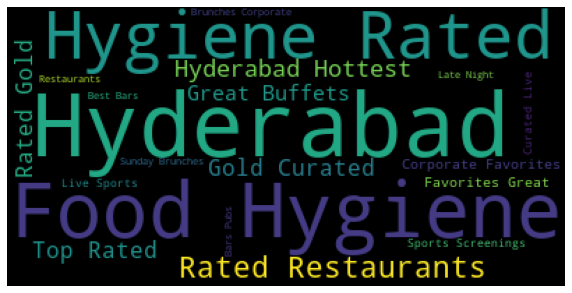

In [52]:
#Creating the wordcloud
print('Top 30 Restaurant Tags')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_restaurant_df.Collections[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [53]:
#Splitting the Collection feature and storing it into a list
collectn_list = zomato_restaurant_df['Collections'].str.split(', ')
collectn_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
                             ...                        
103                                     [Tags Undefined]
104                               [Pan-Asian Delicacies]
104                               [Pan-Asian Delicacies]
104                               [Pan-Asian Delicacies]
104                               [Pan-Asian Delicacies]
Name: Collections, Length: 310, dtype: object

In [54]:
#creating a dictitionary to store collections and its counts for different restaurants
collectn_dict = {}
for collections in collectn_list:
  for collection in collections:
    if collection in collectn_dict:
      collectn_dict[collection]+=1
    else:
      collectn_dict[collection]=1


In [55]:
# converting the cuisine dictionary to a data frame 
collections_df=pd.DataFrame.from_dict([collectn_dict]).transpose().reset_index().rename(columns={'index':'Collections',0:'Number of Restaurants'})

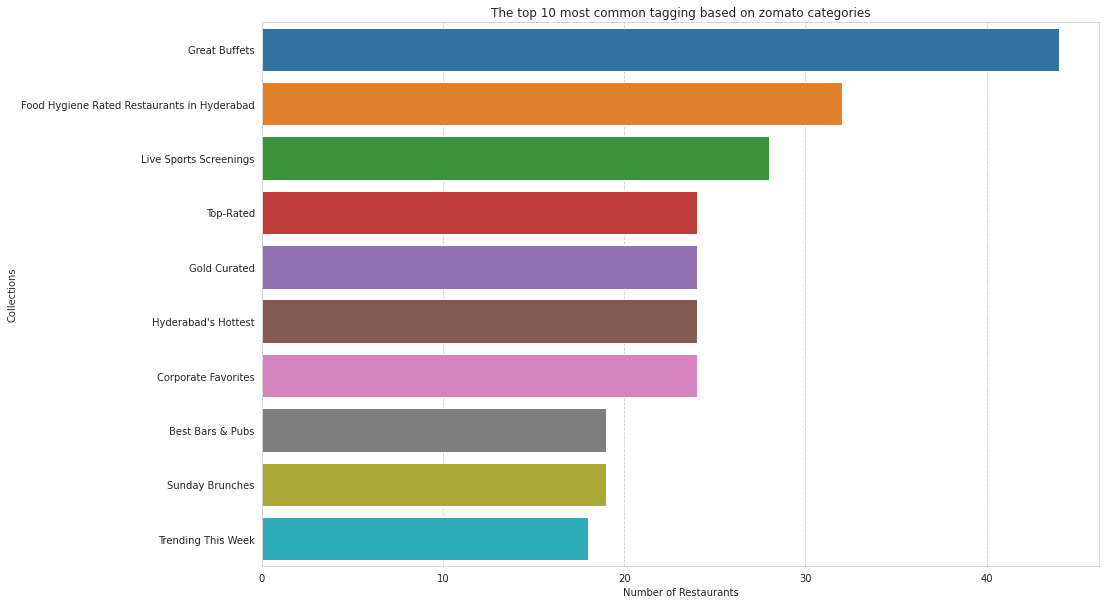

In [56]:
#The top 10 most common tagging based on zomato categories
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(y='Collections',
            x="Number of Restaurants", 
            data=collections_df, 
            order=collections_df.sort_values('Number of Restaurants',ascending=False).Collections[1:11])
   

plt.title('The top 10 most common tagging based on zomato categories')
plt.show()

##**Zomato Review Data Set**

##**Ratings**

In [57]:
#Let's find out restaurant with highest rating
restaurant_rating_df = zomato_reviews_df.groupby(['Restaurant']).agg({'Rating':'mean'}).reset_index()
restaurant_rating_df

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

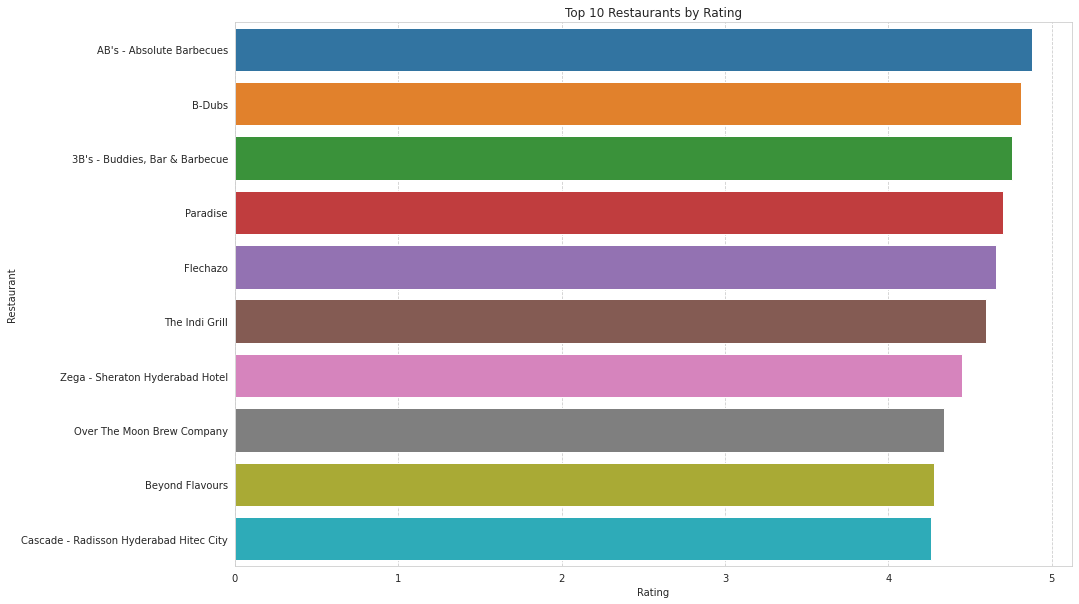

In [58]:
#The Top 10 restaurants based on the ratings
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=restaurant_rating_df, x='Rating', y='Restaurant', order=restaurant_rating_df.sort_values('Rating',ascending=False).Restaurant[:10])
plt.title('Top 10 Restaurants by Rating')

Text(0.5, 1.0, 'The Worst 10 Restaurants by Rating')

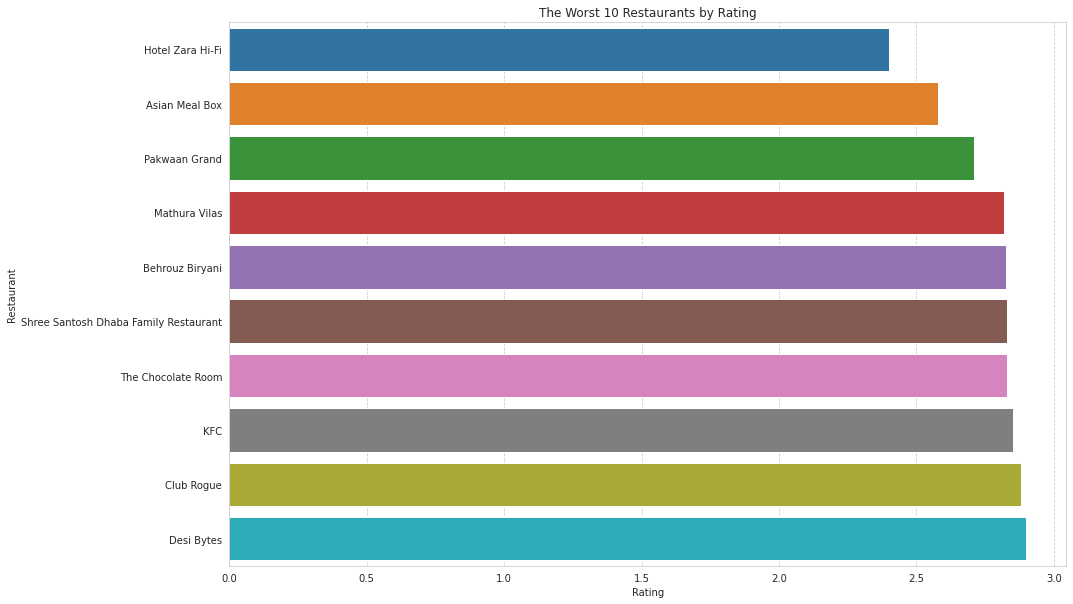

In [59]:
#The Worst 10 restaurants based on the ratings
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=restaurant_rating_df, x='Rating', y='Restaurant', order=restaurant_rating_df.sort_values('Rating').Restaurant[:10])
plt.title('The Worst 10 Restaurants by Rating')

##**Reviewer**

Most Rated Reviewer


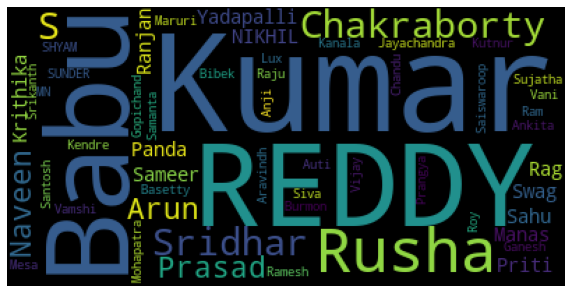

In [60]:
#Creating the wordcloud
print('Most Rated Reviewer')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_reviews_df.sort_values('Rating',ascending=False).Reviewer[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Top 10 Reviewers by no of reviews')

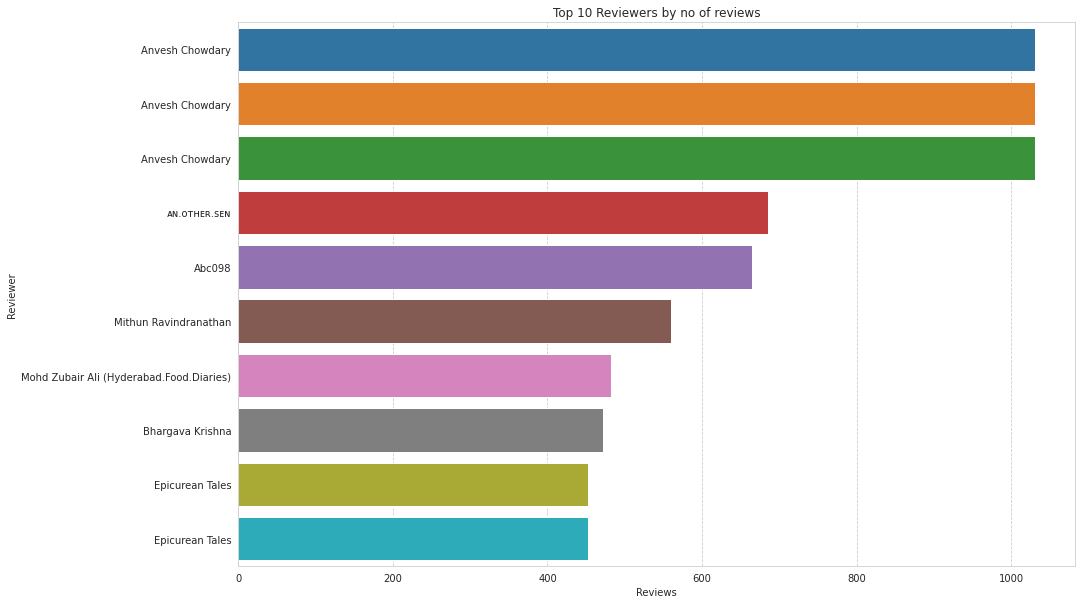

In [61]:
#The Top 10 Reviewers based on number of reviews
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=zomato_reviews_df, x='Reviews', y='Reviewer', order=zomato_reviews_df.sort_values('Reviews',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by no of reviews')

In [62]:
#Grouping Reviewers by Rating 
reviewer_ = zomato_reviews_df.groupby(['Reviewer']).agg({'Rating':'mean'}).reset_index()
reviewer_

,Reviewer,Rating
0,#FOODPORN,5.0
1,#chloesviews // CAH,5.0
2,$ign,4.0
3,4mybanti,2.0
4,@FuloriBinaChutneyKaiseBani,5.0
...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,4.0
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,2.0
7439,✌️✌️Reddy 🥂🍽️,4.0
7440,✔️ Sonu,3.5


Text(0.5, 1.0, 'Top 10 Reviewers by ratings')

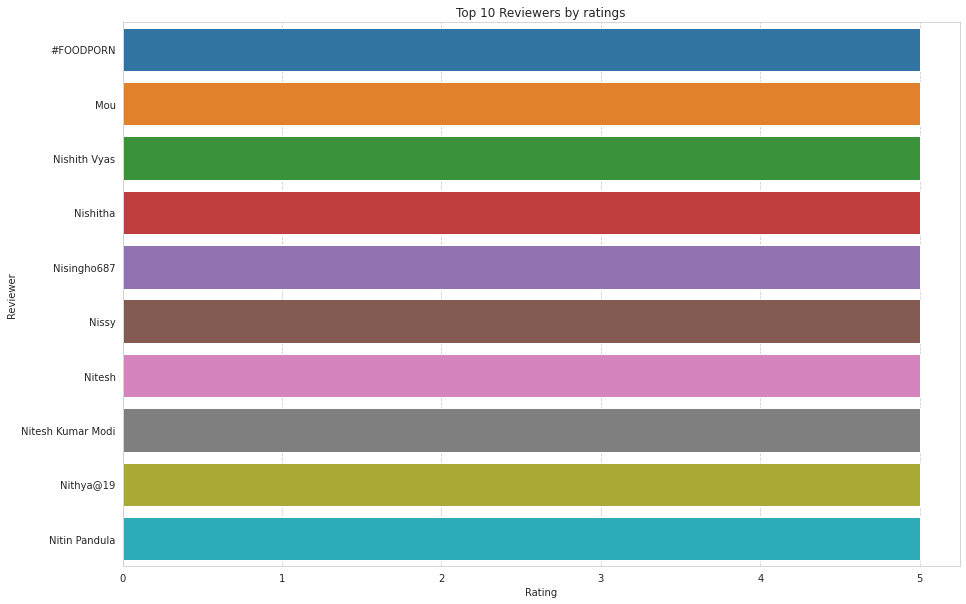

In [63]:
#The Top 10 Reviewers based on  ratings
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=reviewer_, x='Rating', y='Reviewer', order=reviewer_.sort_values('Rating',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by ratings')

In [64]:
#Grouping Reviewers by Rating Mean and by Reviews & Followers Sum
reviewer_df = zomato_reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
reviewer_df

,Reviewer,Reviews,Followers,Rating
0,#FOODPORN,35.0,5873.0,5.0
1,#chloesviews // CAH,3.0,1.0,5.0
2,$ign,50.0,55.0,4.0
3,4mybanti,7.0,4.0,2.0
4,@FuloriBinaChutneyKaiseBani,86.0,244.0,5.0
...,...,...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,3.0,30.0,4.0
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0,794.0,2.0
7439,✌️✌️Reddy 🥂🍽️,94.0,99.0,4.0
7440,✔️ Sonu,78.0,156.0,3.5


Text(0.5, 1.0, 'Top 10 Reviewers by no of Followers')

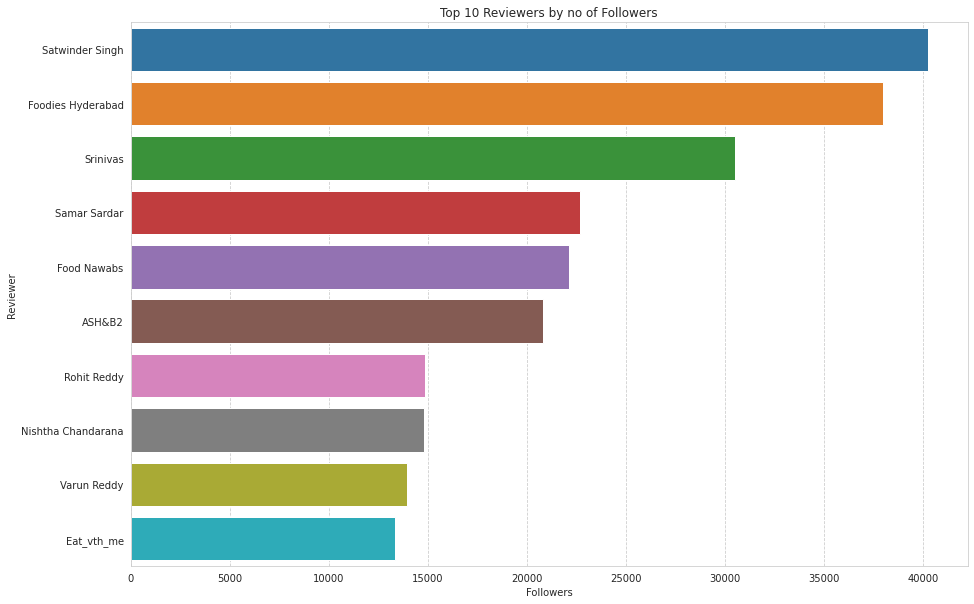

In [65]:
#The Top 10 Reviewers based on rating mean , reviews and followers sum
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=reviewer_df, x='Followers', y='Reviewer', order=reviewer_df.sort_values('Followers',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by no of Followers')

In [66]:
#finding the most active reviewer to be focused on
most_active_reviewer=reviewer_df[(reviewer_df['Followers'] > 1000)&(reviewer_df['Reviews']>1000)&(reviewer_df['Rating']>3.5)].reset_index()
most_active_reviewer

,index,Reviewer,Reviews,Followers,Rating
0,729,Anupam Acharya,1035.0,2000.0,3.600000
1,833,Arjun,1065.0,6237.0,4.200000
2,903,Asad Rana,1086.0,12306.0,3.666667
3,1019,Avin Seth,1576.0,11064.0,4.500000
4,1720,Epicurean Tales,1356.0,7392.0,4.000000
5,1951,Gourmet Hunter,1617.0,2849.0,4.142857
6,3328,Moonis Ahmed,1120.0,5278.0,3.571429
7,3480,Namit Agarwal,1253.0,13139.0,3.857143
8,4252,Priyambada Choudhury,1376.0,3908.0,4.750000
9,5235,Sambhangi Sandeep,1638.0,4816.0,4.428571


Text(0.5, 1.0, 'Top 10 active reviewers ')

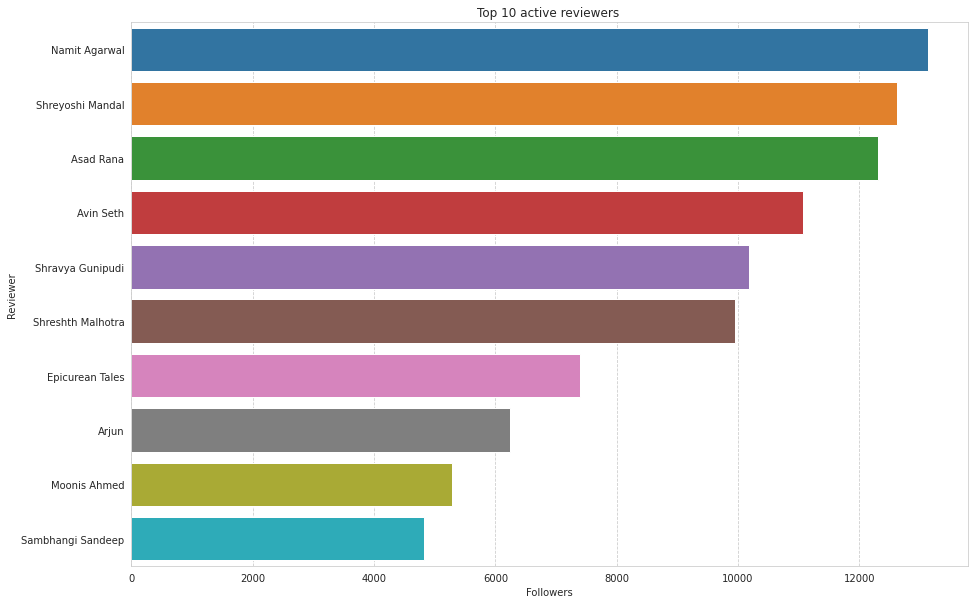

In [67]:
#The Top 10 Active Reviewers 
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=most_active_reviewer, x='Followers', y='Reviewer', order=most_active_reviewer.sort_values('Followers',ascending=False).Reviewer[:10])
plt.title('Top 10 active reviewers ')

##**Timing**

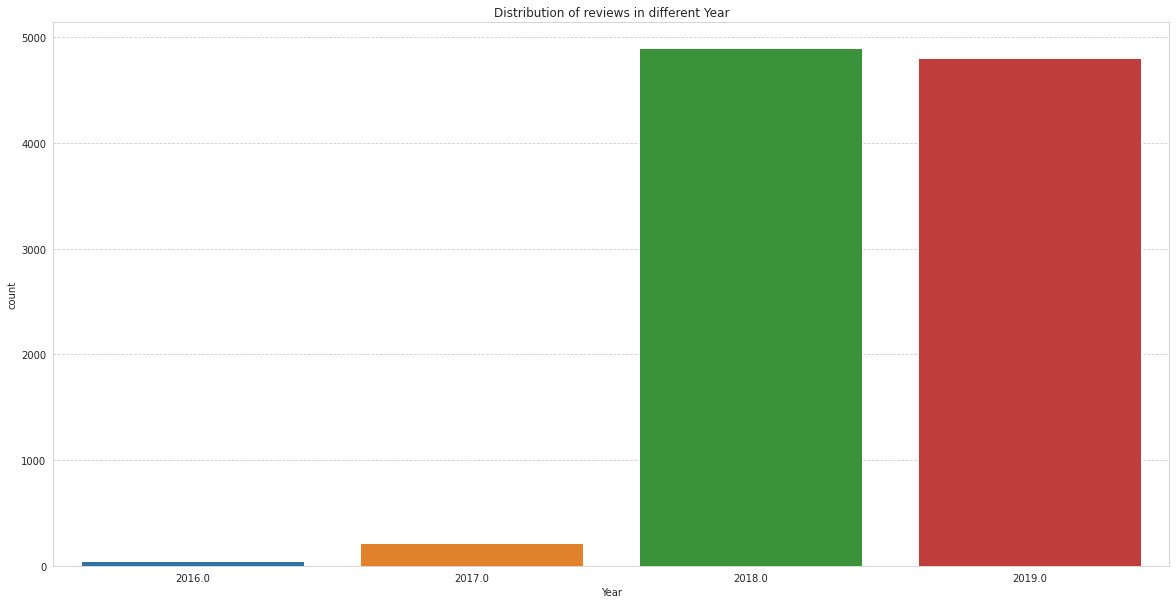

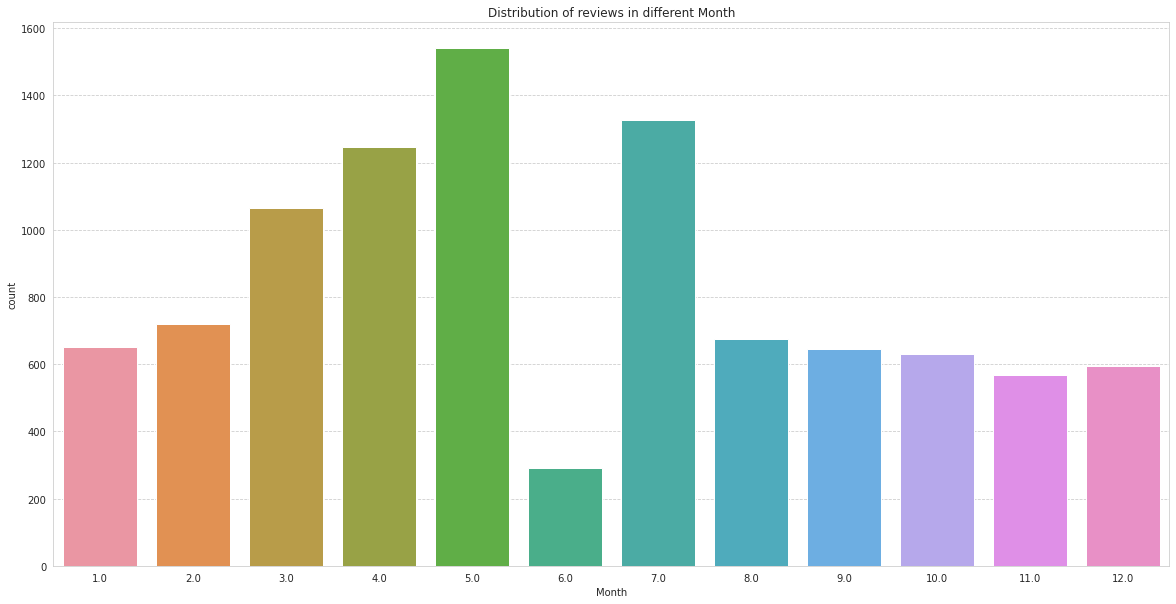

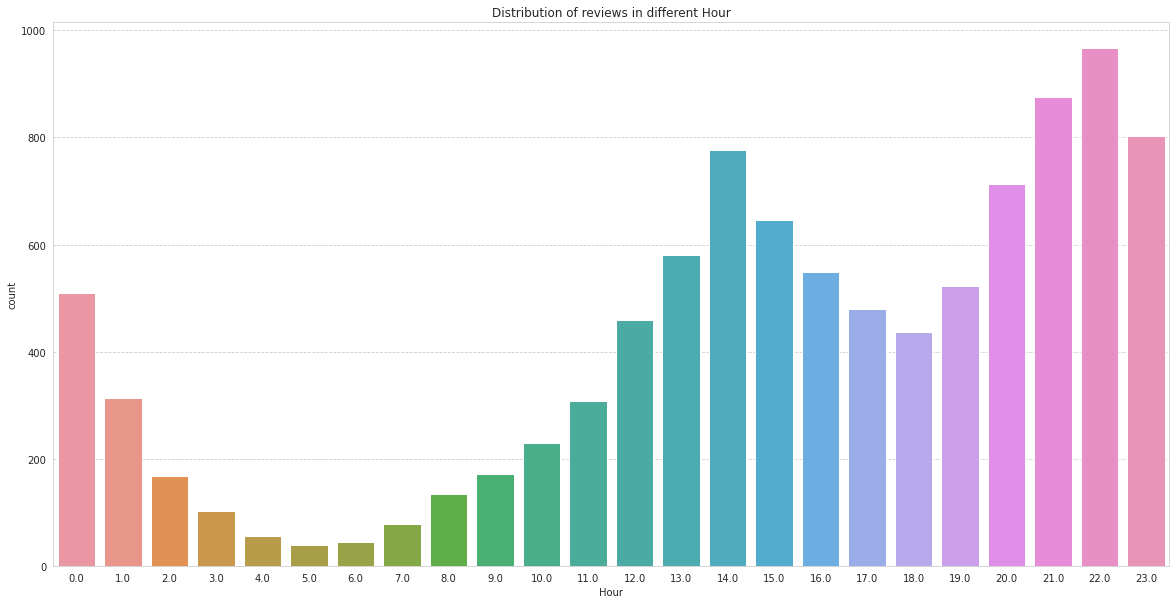

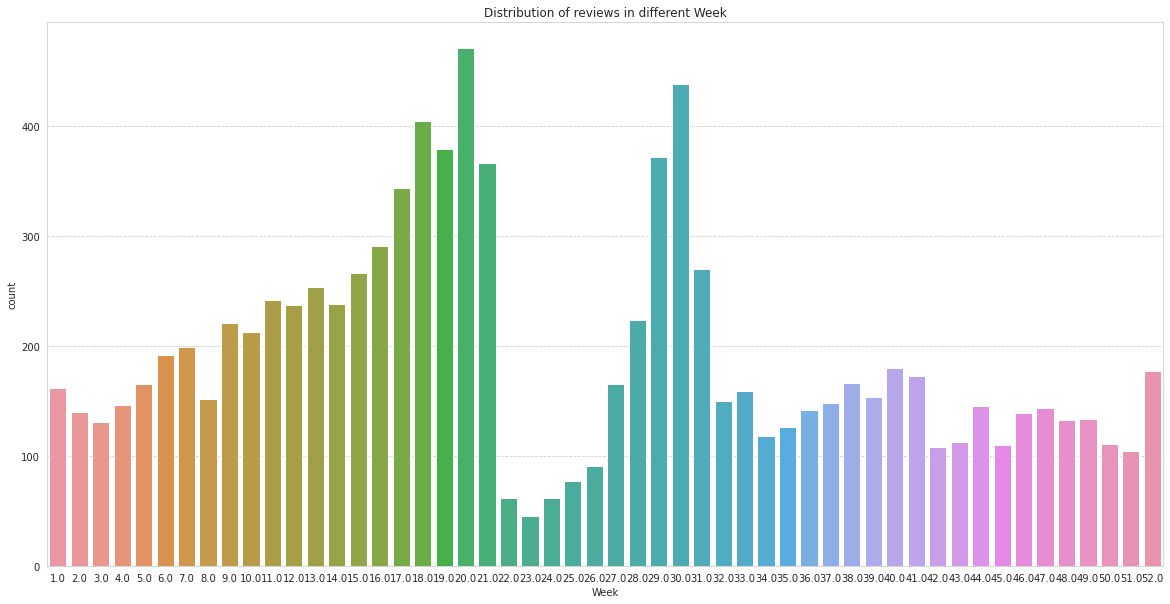

In [68]:
# Visualizing the time feature
time_list = ['Year','Month','Hour','Week']
for i in time_list:
  figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (20,10))
  sns.countplot(data=zomato_reviews_df, x=i)
  plt.title(f"Distribution of reviews in different {i}")

##**EDA Findings:**

*   The collage-Hyatt Hyderbad Gachibowli  is the most expensive restaurant available and the most affordable restaurant for the customers are the Amul and Mohammedia Shawarma.

*   The North Indian Cuisine is one of the cuisine highly in demand  followed by Chinese Cuisine and the least in demand cuisines are Wraps and Mexican. 

*   The most expensive Cuisine is the Modern India cuisine which cost around 2000 rupees and the least expensive item available at a cost of 200 rupees is the Mithai .

*   The Beyond Flavours Restaurant is  the only restaurant with six different variety of cuisines available.

*   Great Buffet is one of the most common Tags given to the zomato restaurants with nearly more than 40 restaurants. 


*   The Restaurant with the highest rating of nearly 4.8 and good reviews is the AB's Absolute Barbecues. On the contrary, the restaurant with worst reviews and rating is the Hotel Zara Hifi with a rating less than 2.5.


*   Anvesh Choudhary is one of the top reviewer based on number of reviews given and Foodporn is the reviewer who has given highest rating.


*   Namit Aggarwal is one of the active reviewer based on number of followers and ratings provided. He has an followers more than 12000 ,so we can consider his reviews with utmost importance for sure.

*   Distribution of reviews based on different months shows that there is a progressive shift in number of reviews from the month of Jan to May ,thereafter a sudden dip in the number of reviews in the month of June.It may be possibly happened due to some internal technical glicth in the zomato site because of which they may not able to collect reviews from the customers end.

*   Distribution of reviews based on different hours in a day shows us that the most of the reviews been given during afternoon time between 12-16 hrs,hence we can say mostly during lunch hours we can see high number of demand from customer end.

*   We are having the distribution of reviews from the year 2016 to 2019 in our dataset and the year 2018 has gained the highest number of reviews followed by the year 2019.









#**Text Preprocessing**

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

Removing punctuations like . , ! $( ) * % @

Removing URLs

Removing Stop words

Lower casing

Tokenization


Lemmatization

In [69]:
# storing reviews in a variable for data processing
reviews = zomato_reviews_df['Review']

In [70]:
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9959    Madhumathi Mahajan Well to start with nice cou...
9960    This place has never disappointed us.. The foo...
9961    Bad rating is mainly because of "Chicken Bone ...
9962    I personally love and prefer Chinese Food. Had...
9963    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [71]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.9 MB/s 
     |████████████████████████████████| 287 kB 37.2 MB/s 


In [72]:
#download small spacy model
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-12 21:45:17.473583: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 121 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [73]:
#Importing spacy advanced nlp library to get the stop words
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'least', 'may', 'n’t', 'same', 'its', 'whereas', 'hundred', 'whom', 'anything', "'re", 'them', 'indeed', 'bottom', 'somehow', 'every', 'whose', 'although', 'namely', 'could', 'already', 'done', 'whatever', 'one', 'himself', 'myself', 'ever', 'n‘t', 'do', 'toward', 'became', 'unless', 'only', 'show', 'empty', '’ve', '‘d', 'without', 'am', 'about', 'amount', '’d', "'ll", 'along', 'me', 'now', 'fifteen', 'been', 'below', 'would', 'third', 'thereafter', 'thru', 'just', 'anywhere', 'towards', 'wherever', 'go', 'if', 'why', 'beyond', 'sometime', 'hers', 'again', 'three', 'onto', 'her', 'you', 'something', 'even', 'mine', 'still', 'rather', 'other', 'sometimes', '’re', 'not', 'besides', 'keep', 'from', 'him', 'five', 'side', 'name', 'but', 'everywhere', 'others', 'us', 'ours', 'own', 'she', 'alone', 'yourselves', 'put', 'amongst', 'his', 'hereby', 'however', 'whether', 'i', '‘ll', 'most', 'such', 'until', 'see', 'nevertheless', 'except', 'per', 'this', '‘re', 'where', 'thereupon', 'whence', 

In [74]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['pron'].is_stop = True
# storing nlp stop words in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['least',
 'may',
 'n’t',
 'same',
 'its',
 'whereas',
 'hundred',
 'whom',
 'anything',
 "'re",
 'them',
 'indeed',
 'bottom',
 'somehow',
 'every',
 'whose',
 'although',
 'namely',
 'could',
 'already',
 'done',
 'whatever',
 'one',
 'himself',
 'myself',
 'ever',
 'n‘t',
 'do',
 'toward',
 'became',
 'unless',
 'only',
 'show',
 'empty',
 '’ve',
 '-PRON-',
 '‘d',
 'without',
 'am',
 'about',
 'amount',
 '’d',
 "'ll",
 'along',
 'me',
 'now',
 'fifteen',
 'been',
 'below',
 'would',
 'third',
 'thereafter',
 'thru',
 'just',
 'anywhere',
 'towards',
 'wherever',
 'go',
 'if',
 'why',
 'beyond',
 'sometime',
 'hers',
 'again',
 'three',
 'onto',
 'her',
 'you',
 'something',
 'even',
 'mine',
 'still',
 'rather',
 'other',
 'sometimes',
 '’re',
 'not',
 'besides',
 'keep',
 'from',
 'him',
 'five',
 'side',
 'name',
 'but',
 'everywhere',
 'others',
 'us',
 'ours',
 'own',
 'she',
 'alone',
 'yourselves',
 'put',
 'amongst',
 'his',
 'hereby',
 'however',
 'whether',
 'i',
 '‘ll',
 '

In [75]:
# functions used for text preprocessing

def lower_case(text):
  '''convert the text into lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(p for p in s if p not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable) 
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''remove shortent  words 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text



def remove_stop_words (text):
  text_2=[]
  for x in reviews:
    text_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        text_1.append(i)
    text_2.append(' '.join(text_1))
  return text_2

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text

def legit_review(review):
  "function to remove words greater than 40 and less than 2"
  final_review_list = []
  for sent in review:
    wor = []
    for word in sent.split(' '):
      if len(word)>2 and len(word)<=40:
        wor.append(word)
    final_review_list.append(' '.join(wor))

  return final_review_list



In [76]:
#applying the function on the reviews data
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=remove_stop_words(reviews)
reviews=lemmatization_(reviews)
reviews =legit_review(reviews)

In [77]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman das kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'reading review finally visit placeambience good come food crispy corn nice tawa fish basket biryani disappoint biryani flattering claim staff polite prompt especially pradeep suman',
 'excellent food specially like spicy

In [78]:
#toal no. of words in reviews
all_words=' '.join(reviews)
len(all_words)

1590360

In [79]:
# storing the reviews in a feature of df
zomato_reviews_df['Reviews']=reviews
zomato_reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0


In [80]:
# droping the old review  column
zomato_reviews_df=zomato_reviews_df.drop('Review',axis=1)

In [81]:
zomato_reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0


#**Sentimental  Analysis** (Unsupervised)

In [82]:
#storing reviews in  reviews_df
reviews_df = zomato_reviews_df['Reviews']
reviews_df

0       ambience good food good saturday lunch cost ef...
1       ambience good pleasant evening service prompt ...
2       try great food great ambience thnx service pra...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9959    madhumathi mahajan start nice courteous server...
9960    place disappoint food courteous staff serene a...
9961    bad rating mainly chicken bone find veg food a...
9962    personally love prefer chinese food couple tim...
9963    check try delicious chinese food see nonveg lu...
Name: Reviews, Length: 9954, dtype: object

### First we develop a list of the top words used by reviewers in reviews textual data, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [83]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

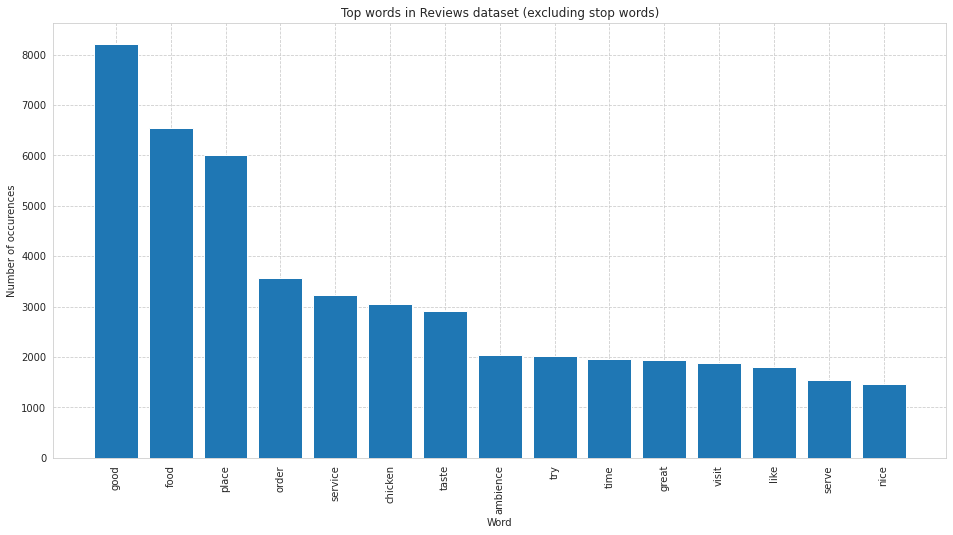

In [84]:
#Visualizing the top words using a barplot
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reviews_df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in Reviews dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## <b> Topic Modelling </b>

### We now apply a clustering algorithm to the reviews corpus in order to study the topic focus of reviews, as well as how it has evolved through time. To do so, we first experiment with a small subsample of the dataset in order to determine which of the two potential clustering algorithms is most appropriate – once this has been ascertained, we can then scale up to a larger portion of the available data.

## <b>Preprocessing</b>


### The only preprocessing step required in our case is feature construction, where we take the sample of text headlines and represent them in some tractable feature space. In practice, this simply means converting each string to a numerical vector. This can be done using the ```CountVectorizer``` object from SKLearn, which yields an $n×K$ document-term matrix where $K$ is the number of distinct words  across the $n$ headlines in our sample (less stop words and with a limit of ```max_features```).

In [85]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words=stop_word_list)
small_text_sample = reviews_df.sample(n=5000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

transformed_reviews=tfidf_vectorizer.fit_transform(reviews_df)

print('Headline after vectorization: \n{}'.format(transformed_reviews[123]))

Headline before vectorization: good
Headline after vectorization: 
  (0, 1870)	0.4384733945188953
  (0, 3795)	0.20350502549344712
  (0, 1552)	0.24277925920660517
  (0, 9592)	0.22772612647473628
  (0, 11213)	0.36496723519555446
  (0, 1683)	0.22135514356948255
  (0, 4778)	0.1371690531540028
  (0, 2379)	0.09736875492977784
  (0, 1484)	0.15898801663372658
  (0, 1064)	0.23511596736195883
  (0, 14014)	0.09873591853492013
  (0, 7414)	0.15594752046250313
  (0, 12818)	0.14989531747591958
  (0, 1534)	0.4906133931471118
  (0, 9561)	0.08256370411036323
  (0, 7752)	0.1029689819130416
  (0, 4558)	0.11226752556735832
  (0, 10342)	0.06892961365807115
  (0, 3008)	0.18016862144379228


### Thus we have our (very high-rank and sparse) training data,  ```small_document_term_matrix```, and can now actually implement a clustering algorithm. Our choice will be Latent Dirichlet Allocation. IT  will take our document-term matrix as input and yield an $n \times N$ topic matrix as output, where $N$ is the number of topic categories (which we supply as a parameter).

## <b>Latent Dirichlet Allocation</b>

### LDA is a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.

In [86]:
#importing lda library
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [87]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(transformed_reviews)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(transformed_reviews))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -80539.22545647601
LDA model Perplexity on train data 7126.559917449985


In [88]:
best_lda_model.components_

array([[0.20003612, 0.20002389, 0.20009952, ..., 0.20004411, 0.20004589,
        0.38293034],
       [0.20243829, 0.2010607 , 0.30425469, ..., 0.20327086, 0.61058583,
        0.20000217],
       [0.20001836, 0.20001279, 0.20004828, ..., 0.20002356, 0.20002615,
        0.20002669],
       [0.20003609, 0.44703966, 0.20009154, ..., 0.20004442, 0.20009164,
        0.20001508],
       [0.45061059, 0.20002096, 0.20007916, ..., 0.93533508, 0.20004047,
        0.20001307]])

In [89]:
# checking for top 15 words in each topic
for index,topic in enumerate(best_lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['ajay', 'shakeel', 'hundi', 'manoj', 'timing', 'straw', 'salty', 'employee', 'delivary', 'chur', 'sarvice', 'respectful', 'goo', 'quantity', 'super']


THE TOP 15 WORDS FOR TOPIC #1
['awesome', 'staff', 'nice', 'time', 'try', 'visit', 'chicken', 'ambience', 'order', 'great', 'taste', 'service', 'place', 'food', 'good']


THE TOP 15 WORDS FOR TOPIC #2
['quality', 'waste', 'piece', 'fast', 'momos', 'good', 'food', 'rice', 'delivery', 'taste', 'bad', 'biryani', 'chicken', 'order', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['goood', 'pradhan', 'makhan', 'loved', 'cock', 'rider', 'bag', 'choka', 'quality', 'low', 'maggie', 'chokha', 'litti', 'poor', 'test']


THE TOP 15 WORDS FOR TOPIC #4
['temptey', 'wrong', 'quick', 'food', 'order', 'thank', 'cold', 'superb', 'good', 'receive', 'late', 'deliver', 'bad', 'time', 'delivery']




### Once again, we take the $\arg \max$ of each entry in the topic matrix to obtain the predicted topic category for each headline. These topic categories can then be characterised by their most frequent words.


In [90]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=57b9fe360a4cbd56807927055b60d5c266806f767c6758ddb517554ce318645d
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e7a7ab2a6ab76b28fe6ff5b3338e596b2bd1d3e7ded0ee7374d86b16943223ce
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [91]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [92]:
# ploting the clusters top 30 terms 
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, transformed_reviews,tfidf_vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  71.244919
2       51.163364 -159.968018       2        1  11.874300
4      -73.144554   21.523815       3        1   6.241776
0      -66.410133 -110.606438       4        1   5.385149
3       54.417324   12.443444       5        1   5.253855, topic_info=             Term        Freq       Total Category  logprob  loglift
3540     delivery   97.000000   97.000000  Default  30.0000  30.0000
14014        time  171.000000  171.000000  Default  29.0000  29.0000
9105         nice  179.000000  179.000000  Default  28.0000  28.0000
1064          bad  138.000000  138.000000  Default  27.0000  27.0000
9561        order  220.000000  220.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
2126        carry    0.867583    3.382474   Topic5  -7.7073   1.5856
11501   restraunt    0.775056    2.544596   Topic5  -7.8201   1.7574
3437     decrease    0.746908    2.244430   Topic5  -7.8571   1.8459
13174  stroganoff    0.675720    1.615866   Topic5  -7.9573   2.0744
4183       edible    0.684045    3.191664   Topic5  -7.9450   1.4059

[287 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
219        3  0.560604       agen
221        3  0.458556      agent
254        4  0.634819       ajay
309        3  0.748618  allauddin
389        1  0.978212    amazing
...      ...       ...        ...
15284      2  0.212680      wrong
15284      3  0.283573      wrong
15352      4  0.888051      yfjgz
15376      2  0.525169       yuck
15428      2  0.976246       zara

[349 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 1, 4])

In [93]:
#creating a copy of zomato review df
zomato_transformed_reviews_df = zomato_reviews_df.copy()

In [94]:
# predicting the sentiments and storing in a feature
topic_results = best_lda_model.transform(transformed_reviews)
zomato_transformed_reviews_df ['sentiments']=topic_results.argmax(axis=1)
zomato_transformed_reviews_df .head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0,1
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0,1
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0,1
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0,1
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0,1


In [95]:
# finding ratings value counts given to sentiment 0
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    87
1.0    27
3.0    24
2.0    19
4.0    18
Name: Rating, dtype: int64

In [96]:
# finding ratings value counts given to sentiment 1
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    3231
4.0    2189
1.0    1153
3.0    1003
2.0     517
4.5      64
3.5      47
2.5      19
1.5       8
Name: Rating, dtype: int64

In [97]:
# finding ratings value counts given to sentiment 2
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==2 ]['Rating'].value_counts()

1.0    418
5.0    295
4.0    131
3.0    130
2.0    121
4.5      5
1.5      1
Name: Rating, dtype: int64

In [98]:
# finding ratings value counts given to sentiment 3
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    32
1.0    27
4.0    14
2.0     9
3.0     5
Name: Rating, dtype: int64

In [99]:
# finding ratings value counts given to sentiment 4
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==4 ]['Rating'].value_counts()

5.0    181
1.0    110
3.0     30
4.0     21
2.0     18
Name: Rating, dtype: int64

##**Non-Negative Matrix Factorization**
Non-negative Matrix Factorization (NNMF) or the positive matrix analysis is another NLP technique for topic modeling. NNMF differs from LDA because it depends on creating two matrices from random numbers. The first matrix represents the relationship between words and topic while the second matrix represents the relationship between the topic and documents that forms the mathematical basis for categorizing texts as happened in LDA.NNMF is also used in image processing applications.NNMF is faster and more accurate than LDA that’s can be simply explained because LDA depends on the frequency of words and the topics were selected according to how much these words were presented.However NNMF selects random correlation values between words and topics and training is run based in words exist or not which enable for adjusting weights as the training repeated. NNMF is more favorable for its dimension reduction.

In [100]:
#importing nmf library
from sklearn.decomposition import NMF

In [101]:
#fitting the nmf model in transformed reviews
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(transformed_reviews)

NMF(n_components=5, random_state=42)

We can view the words in this article through ’tfidf.get_ featur_names’ and pass the index number of the word. So the top 15 words in a topic can be viewed through the ’argsort’ function which sorts values from least to highest. For sure we need to to iterate in tuple, therefore we will use enumerate function on NMF.components where components are the topics in our corpus as follows:

In [102]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['boy', 'polite', 'test', 'quantity', 'price', 'quality', 'ambiance', 'spicy', 'ambience', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['excellent', 'serve', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'service', 'overall', 'hangout', 'family', 'thank', 'enjoy', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'person', 'thank', 'awesome', 'guy', 'excellent', 'super', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['piece', 'spicy', 'try', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'bad', 'biryani', 'taste', 'order', 'chicken']




So we can see above, we got words in the first topic like price, taste,spicy, quality and service which suggests that this topic is about the food attributes while in fourth topic  for example, the most valuable words are ‘delivery, fast, guy, excellent,'late’ and that suggest that topic 4 is about delivery service.

In [103]:
#applying nmf model to transformed reviews
topic_result = nmf_model.transform(transformed_reviews)

In [104]:
#storing nmf topic result as sentiments feature in zomato transformed reviews
zomato_transformed_reviews_df['sentiments']=topic_result.argmax(axis=1)

In [105]:
# finding ratings value counts given to sentiment 0
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    648
4.0    268
3.0    109
1.0     52
2.0     50
4.5      7
3.5      3
2.5      1
Name: Rating, dtype: int64

In [106]:
# finding ratings value counts given to sentiment 1
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    2014
4.0    1192
3.0     519
1.0     498
2.0     248
4.5      35
3.5      14
2.5      11
1.5       1
Name: Rating, dtype: int64

In [107]:
# finding ratings value counts given to sentiment 2
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==2 ]['Rating'].value_counts()

5.0    341
4.0    167
3.0     57
1.0      9
2.0      6
4.5      5
3.5      3
1.5      1
Name: Rating, dtype: int64

In [108]:
# finding ratings value counts given to sentiment 3
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    288
1.0     99
4.0     65
3.0     36
2.0     24
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [109]:
# finding ratings value counts given to sentiment 4
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==4 ]['Rating'].value_counts()

1.0    1077
4.0     681
5.0     535
3.0     471
2.0     356
3.5      25
4.5      19
1.5       7
2.5       6
Name: Rating, dtype: int64

In [110]:
# classified sentiments feature into positive and negative class
zomato_transformed_reviews_df['sentiments']=zomato_transformed_reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

In [111]:
# finding ratings value counts given to negative sentiments
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1176
5.0     823
4.0     746
3.0     507
2.0     380
3.5      27
4.5      22
2.5       7
1.5       7
Name: Rating, dtype: int64

In [112]:
# finding ratings value counts given to positive sentiments
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3003
4.0    1627
3.0     685
1.0     559
2.0     304
4.5      47
3.5      20
2.5      12
1.5       2
Name: Rating, dtype: int64

In [113]:
zomato_transformed_reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0,positive
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0,positive
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0,positive
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0,positive
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0,positive


# **Sentiment Analysis** (Superviesd)


## **Feature Engineering for Sentimental Analysis**


In [151]:
#we will use zomato_review_dataset for this analysis
zomato_reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0


In [152]:
#Considered Rating and Reviews features  for our sentimental analysis
df_sentiment=zomato_reviews_df[['Rating','Reviews']]
df_sentiment

,Rating,Reviews
0,5.0,ambience good food good saturday lunch cost ef...
1,5.0,ambience good pleasant evening service prompt ...
2,5.0,try great food great ambience thnx service pra...
3,5.0,soumen das arun great guy behavior sincerety g...
4,5.0,food goodwe order kodi drumstick basket mutton...
...,...,...
9959,3.0,madhumathi mahajan start nice courteous server...
9960,4.5,place disappoint food courteous staff serene a...
9961,1.5,bad rating mainly chicken bone find veg food a...
9962,4.0,personally love prefer chinese food couple tim...


In [153]:
#used a function to convert the rating feature into binary values(0 and 1)
def rating_bin(rating):
  if rating >=3.5:
    return 1 
    # positive sentiment
  else:
    return 0
    # negative sentiment 

In [154]:
#new feature sentiment created using the raing_bin function
df_sentiment['Sentiment'] = df_sentiment['Rating'].apply(lambda x:rating_bin(x))
df_sentiment.head()

,Rating,Reviews,Sentiment
0,5.0,ambience good food good saturday lunch cost ef...,1
1,5.0,ambience good pleasant evening service prompt ...,1
2,5.0,try great food great ambience thnx service pra...,1
3,5.0,soumen das arun great guy behavior sincerety g...,1
4,5.0,food goodwe order kodi drumstick basket mutton...,1


In [155]:
df_sentiment.shape

(9954, 3)

In [156]:
# creating X and y varibles i.e independent and dependent variable
X = df_sentiment['Reviews']
y = df_sentiment['Sentiment']

In [157]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=df_sentiment['Sentiment'])

In [158]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [159]:
#Determining the shape of our review feature in train and test data
X_train.shape , X_test.shape

((7465, 358), (2489, 358))

In [160]:
# defining empty list to store the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]



In [161]:
# making a function to train the model and evaluate the model
def model_eval (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True,random_state=10):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

 
  #training the model
  model.fit(X_train,y_train)
  
  # finding the best parameters of the model if any 

  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  # finding best score of the model

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model

  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating different evaluation matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*50,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix  in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the train and test score
  # for train set
  print('train score')
  print('*'*50)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('test score')
  print('*'*50)
  score(y_test,y_pred_test)



## **Logisitic Regression**


In [162]:
from sklearn.linear_model import LogisticRegression
# creating LogisticRegression model
log_reg = LogisticRegression()

In [163]:
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
model_1 = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [164]:
# training and evaluating the model
model_eval(model_1, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters found out to be : {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.9505896925222445 

train score
**************************************************
	The accuracy is  0.8444742129939719
	The precision is  0.8281622911694511
	The recall is  0.9524915540540541
	The f1 is  0.8859864480015713
	the auc  is  0.8047543882399255 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.89      0.66      0.76      2729
           1       0.83      0.95      0.89      4736

    accuracy                           0.84      7465
   macro avg       0.86      0.80      0.82      7465
weighted avg       0.85      0.84      0.84      7465



test score
**************************************************
	The accuracy is  0.8429087987143431
	The precision is  0.8256578947368421
	The rec


## **Desision Tree**


In [165]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
model_2 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=50,criterion='entropy')

# training and evaluating the DecisionTree
model_eval(model_2,X_test, X_train, y_test, y_train)

train score
**************************************************
	The accuracy is  0.7832551908908238
	The precision is  0.8575688073394495
	The recall is  0.7894847972972973
	The f1 is  0.8221196130167105
	the auc  is  0.7809644580110525 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      2729
           1       0.86      0.79      0.82      4736

    accuracy                           0.78      7465
   macro avg       0.77      0.78      0.77      7465
weighted avg       0.79      0.78      0.79      7465



test score
**************************************************
	The accuracy is  0.7665729208517477
	The precision is  0.8380758807588076
	The recall is  0.7834072197593414
	The f1 is  0.8098199672667757
	the auc  is  0.7603849285609894 

				classification report
 ************************************************** 
               precision    recall 


## **Random forest**


In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [168]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
model_3 = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [169]:
# training and evaluating the Random Forest Regressor
model_eval(model_3,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 150}
 
where negative mean squared error is:  0.9917661241711875 

train score
**************************************************
	The accuracy is  0.7798312575331459
	The precision is  0.7425882352941177
	The recall is  0.999366687777074
	The f1 is  0.8520518358531318
	the auc  is  0.6991338933390865 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       1.00      0.40      0.57       910
           1       0.74      1.00      0.85      1579

    accuracy                           0.78      2489
   macro avg       0.87      0.70      0.71      2489
weighted avg       0.84      0.78      0.75      2489



test score
**************************************************
	The accuracy is  0.7548559946416611
	The precision is  0.72367610837


##**XGboost**


In [170]:
from xgboost import XGBClassifier

In [171]:
xgb=XGBClassifier()

In [172]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
model_4=GridSearchCV(estimator=xgb,param_grid=xgb_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [173]:
# training and evaluating the xgb_grid
model_eval(model_4,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
 
where negative mean squared error is:  0.9032935981418561 

train score
**************************************************
	The accuracy is  0.9632953784326859
	The precision is  0.9750851788756388
	The recall is  0.9668496621621622
	The f1 is  0.970949957591179
	the auc  is  0.9619884074826934 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2729
           1       0.98      0.97      0.97      4736

    accuracy                           0.96      7465
   macro avg       0.96      0.96      0.96      7465
weighted avg       0.96      0.96      0.96      7465



test score
**************************************************
	The accuracy is  0.8521494576134994
	The precision is  0.8663036902


## **LightGBM**


In [174]:
import lightgbm as lgb

In [175]:
lgbm=lgb.LGBMClassifier()

In [176]:
# finding the best parameters for LightGBM by gridsearchcv
lgbm_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
model_5=GridSearchCV(estimator=lgbm,param_grid=lgbm_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [177]:
# training and evaluating the lgbr_grid
model_eval(model_5,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best parameters found out to be : {'max_depth': 15, 'n_estimators': 100}
 
where negative mean squared error is:  0.8982279030355373 

train score
**************************************************
	The accuracy is  0.9197588747488279
	The precision is  0.9285270354257302
	The recall is  0.9463682432432432
	The f1 is  0.9373627522743908
	the auc  is  0.9099741546007348 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2729
           1       0.93      0.95      0.94      4736

    accuracy                           0.92      7465
   macro avg       0.92      0.91      0.91      7465
weighted avg       0.92      0.92      0.92      7465



test score
**************************************************
	The accuracy is  0.8473282442748091
	The precision is  0.8648813146682898
	The recall is  


## **Model Summary**


In [178]:
#creating dictionary to store all the metrices 
model_result={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [179]:
# list of all models
model_names=['Logistic Regrestion','Desision Tree','Random forest','XGboost','LightGBM',]

In [180]:
# converting dictionary to dataframe
models_result_df=pd.DataFrame.from_dict(model_result,orient="index",columns=model_names)

In [181]:
models_result_df=models_result_df.transpose().reset_index().rename(columns={'index':'Models'})

In [182]:
models_result_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logistic Regrestion,0.842909,0.825658,0.953768,0.885101,0.802159
1,Desision Tree,0.766573,0.838076,0.783407,0.809820,0.760385
2,Random forest,0.754856,0.723676,0.992610,0.837073,0.667430
3,XGboost,0.852149,0.866304,0.906903,0.886139,0.832023
4,LightGBM,0.847328,0.864881,0.899937,0.882061,0.827990


## **ROC curve for all the models**


In [183]:
# finding the best parameters for all the models
log_reg_best=model_1.best_estimator_
rfc_best=model_3.best_estimator_
xgbc_best=model_4.best_estimator_
lgbc_best=model_5.best_estimator_


In [184]:
# predicting the sentiment by all models

y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dtc = model_2.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [185]:
from sklearn.metrics import roc_curve

In [186]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (model_2, y_preds_proba_dtc), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

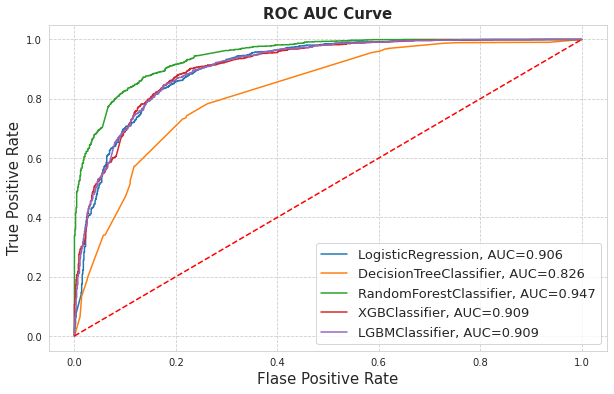

In [187]:
# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label= "{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
             

plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()